# Dataset Merging & Preprocessing

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Binary Classification Dataset Merging

In [2]:
df_TB1 = pd.read_csv('CSurvey1_Trans_Binary_imb.csv')
df_TB2 = pd.read_csv('CSurvey2_Trans_Binary_imb.csv')

In [3]:
print('Dataset1:', df_TB1.shape)
print('Dataset2:', df_TB2.shape)

Dataset1: (673, 41)
Dataset2: (614, 41)


In [4]:
merge_B_imb = [df_TB1, df_TB2]
merge_B_imb = pd.concat(merge_B_imb)

In [5]:
# merge_B_imb.to_csv('merge_B_imb.csv', index = False)

# 5-Level Classification Dataset Merging

In [6]:
df_T5L1 = pd.read_csv('CSurvey1_Trans_5level_imb.csv')
df_T5L2 = pd.read_csv('CSurvey2_Trans_5level_imb.csv')

In [7]:
print('Dataset1:', df_T5L1.shape)
print('Dataset2:', df_T5L2.shape)

Dataset1: (673, 41)
Dataset2: (614, 41)


In [8]:
merge_5L_imb = [df_T5L1, df_T5L2]
merge_5L_imb = pd.concat(merge_5L_imb)

In [9]:
# merge_5L_imb.to_csv('merge_5L_imb.csv', index = False)

# Merged Dataset

In [10]:
merge_B_imb = pd.read_csv('merge_B_imb.csv')
merge_5L_imb = pd.read_csv('merge_5L_imb.csv')

In [11]:
print(merge_B_imb.shape)
print(merge_5L_imb.shape)

(1287, 41)
(1287, 41)


# Data Balancing for Binary Classification using RandomOverSampler

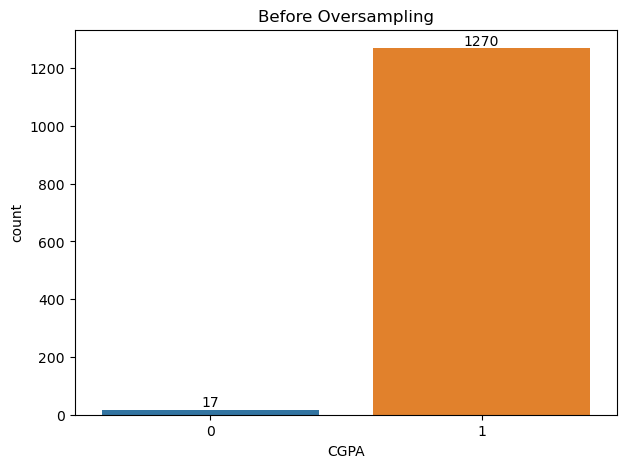

In [12]:
plt.figure(figsize = (7,5))
plt.title("Before Oversampling")
ax = sns.countplot(x = 'CGPA', data = merge_B_imb)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Merge Dataset Before RandomOversampling.png', dpi=300)
plt.show()

In [13]:
y = merge_B_imb.CGPA
X = merge_B_imb.drop("CGPA", axis = 1)
colnames = X.columns

In [14]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [15]:
ros = RandomOverSampler(sampling_strategy = 'auto')
os_tX, os_ty = ros.fit_resample(X, y)

tX = merge_B_imb.drop("CGPA", axis = 1)
t_columns = tX.columns

length of oversampled data is  2540


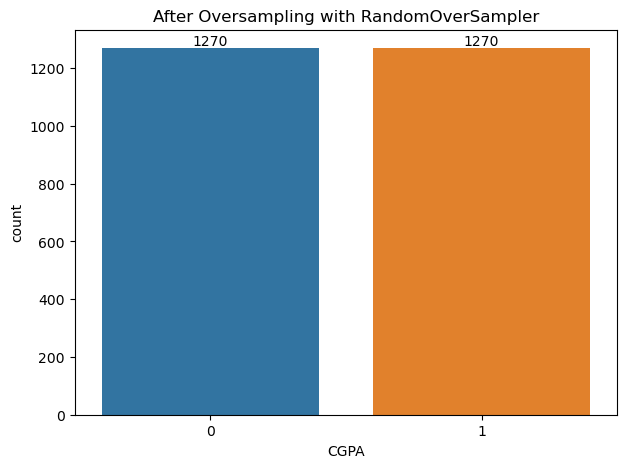

In [16]:
os_tX = pd.DataFrame(data = os_tX, columns = t_columns)
os_ty = pd.DataFrame(data = os_ty, columns = ['CGPA'])
print("length of oversampled data is ", len(os_tX))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with RandomOverSampler")
ax = sns.countplot(x = 'CGPA', data = os_ty)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Merge Dataset After RandomOversampling.png', dpi=300)
plt.show()

In [17]:
frames = [os_tX, os_ty]

tros_merged = pd.concat(frames, axis = 1)

tros_merged.shape

(2540, 41)

In [18]:
# tros_merged.to_csv('merge_B_ROS.csv', index = False)

# Data Balancing for Binary Classification using SMOTE

In [19]:
smote = SMOTE(sampling_strategy='auto')

os_tX_smote, os_ty_smote = smote.fit_resample(X, y)

length of oversampled data is  2540


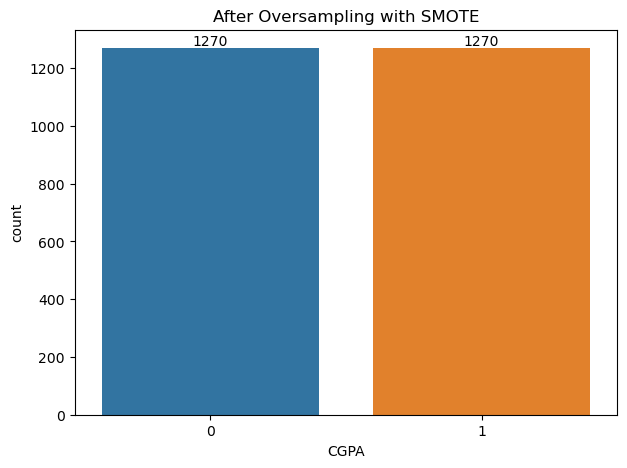

In [20]:
os_tX_smote = pd.DataFrame(data = os_tX_smote, columns = t_columns)
os_ty_smote = pd.DataFrame(data = os_ty_smote, columns = ['CGPA'])
print("length of oversampled data is ", len(os_tX_smote))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with SMOTE")
ax = sns.countplot(x = 'CGPA', data = os_ty_smote)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Merge Dataset After SMOTE.png', dpi=300)
plt.show()

In [21]:
frames = [os_tX_smote, os_ty_smote]

tros_merged_smote = pd.concat(frames, axis = 1)

tros_merged_smote.shape

(2540, 41)

In [22]:
# tros_merged_smote.to_csv('merge_B_SMOTE.csv', index = False)

# Data Balancing for 5 Level Classification using RandomOverSampler

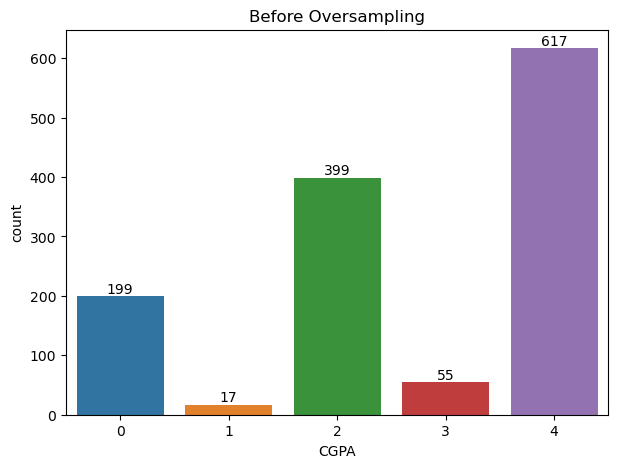

In [23]:
plt.figure(figsize = (7,5))
plt.title("Before Oversampling")
ax = sns.countplot(x = 'CGPA', data = merge_5L_imb)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Merge Dataset 5 class Before RandomOversampling.png', dpi=300)
plt.show()

In [24]:
f_y = merge_5L_imb.CGPA
f_X = merge_5L_imb.drop("CGPA", axis = 1)
f_colnames = f_X.columns

In [25]:
ros = RandomOverSampler(sampling_strategy = 'auto')
os_fX, os_fy = ros.fit_resample(f_X, f_y)

fX = merge_5L_imb.drop("CGPA", axis = 1)
f_columns = fX.columns

length of oversampled data is  3085


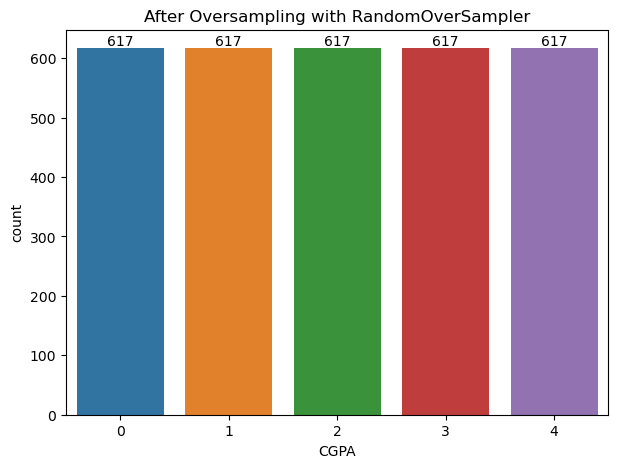

In [26]:
os_fX = pd.DataFrame(data = os_fX, columns = f_columns)
os_fy = pd.DataFrame(data = os_fy, columns = ['CGPA'])
print("length of oversampled data is ", len(os_fX))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with RandomOverSampler")
ax = sns.countplot(x = 'CGPA', data = os_fy)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Merge Dataset 5 class After RandomOversampling.png', dpi=300)
plt.show()

In [27]:
frames = [os_fX, os_fy]

fros_merged = pd.concat(frames, axis = 1)

fros_merged.shape

(3085, 41)

In [28]:
# fros_merged.to_csv('merge_5L_ROS.csv', index = False)

# Data Balancing for 5 Level Classification using SMOTE

In [29]:
os_fX_smote, os_fy_smote = smote.fit_resample(f_X, f_y)

length of oversampled data is  3085


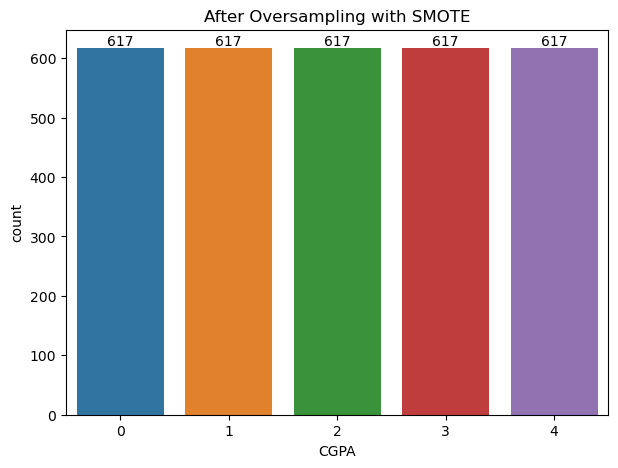

In [30]:
os_fX_smote = pd.DataFrame(data = os_fX_smote, columns = f_columns)
os_fy_smote = pd.DataFrame(data = os_fy_smote, columns = ['CGPA'])
print("length of oversampled data is ", len(os_fX_smote))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with SMOTE")
ax = sns.countplot(x = 'CGPA', data = os_fy_smote)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Merge Dataset 5 class After SMOTE.png', dpi=300)
plt.show()

In [31]:
frames = [os_fX_smote, os_fy_smote]

fros_merged_smote = pd.concat(frames, axis = 1)

fros_merged_smote.shape

(3085, 41)

In [32]:
# fros_merged_smote.to_csv('merge_5L_SMOTE.csv', index = False)